# Progressive GAN
Originally proposed by Karras et al. is their work titled Progressive Growing Of GANS for Improved Quality, Stability and Variation. The main contributions from the work apart from step by step method of progressing/increasing the resolution of output samples are:
- Smooth Fade-in
- Minibatch Standard Deviation
- Equalized Learning Rate
- Pixelwise Normalization

This notebook uses a pretrained version of the model using ```tensorflow hub``` and ```tf2.0``

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PacktPublishing/Hands-On-Generative-AI-with-Python-and-TensorFlow-2/blob/master/Chapter_6/pro_gan_tfhub.ipynb)

## Load Libraries

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

## Check Hub and TF Versions

In [2]:
print("Tensorflow Version={}".format(tf.__version__))
print("TF-Hub Version={}".format(hub.__version__))

Tensorflow Version=2.2.0
TF-Hub Version=0.8.0


## Utility Method

In [3]:
def sample_images(generator, z_dim=100,
                  save_output=True,
                  output_dir="images"):
    """
    Utility method to sample and plot random 25 generator samples
    in a 5x5 grid and save
    Parameters:
        generator:  type:tensorflow.keras.model. Generator model object
        z_dim:      int(positive). Size of input noise vector.
                    Default is 100
        save_output:type:boolean. Saves plot to disk if true.
                    Default is True
        output_dir: type:str. Directory path to save generated samples.
                    used only if save_output=True.
                    Default value is "images"
    Returns:
        None
    """
    r, c = 5, 5
    noise = tf.random.normal([r*c, 512])
    gen_imgs = pro_gan(noise)['default']

    plt.figure(figsize=(20,20))
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, :].numpy())
            axs[i, j].axis('off')
            cnt += 1
    plt.show()
    if save_output:
        fig.savefig("{}/pro_gan_sample_grid.png".format(output_dir))
    plt.close()

## Load Model

In [4]:
tf.random.set_seed(12)

In [5]:
pro_gan = hub.load("https://tfhub.dev/google/progan-128/1").signatures['default']

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Generate Face
- Randomly sample a vector of size 512 from a normal distribution
- Pass it through the trained model to get output

In [6]:
vector = tf.random.normal([1, 512])
sample_image = pro_gan(vector)['default'][0]

In [7]:
np_img = sample_image.numpy()

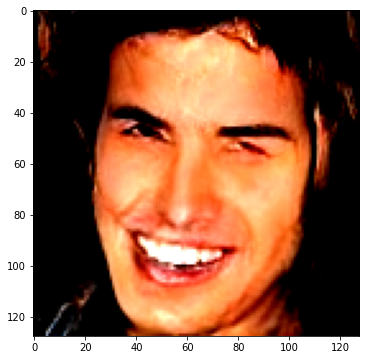

In [8]:
plt.figure(figsize=(6,6))
plt.imshow(np_img)

## Generate a Sample of 25 Random Faces
- Randomly sample 25 vectors from a normal distribution
- The model output shows good diversity

<Figure size 1440x1440 with 0 Axes>

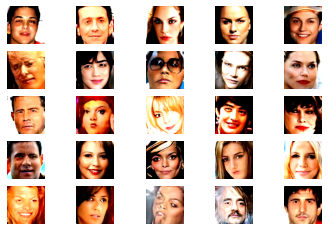

In [9]:
sample_images(pro_gan,512)